## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

#use merge to produce single dataframe
mouse_study = pd.merge(mouse_metadata,study_results,on='Mouse ID')


# Display the data table for preview

#print the first 10 to show data format
mouse_study.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.

#the number of unique mice IDs is the number of mice studied
mice_num = len(mouse_study['Mouse ID'].unique())

#prints number of mice to terminal
print(f'There are {mice_num} mice')


There are 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


#produce a new dataframe for the mouse by getting all rows where the ID is k403, 
# k403 is the first mouse in the list
mouse1 = mouse_study.loc[(mouse_study['Mouse ID']=='k403')]


#checks if the the number of timepoints is different from the number of unique timepoints
#drop duplicates is used to remove dupicate timepoints
mouse1Duplicates = len(mouse1.drop_duplicates('Timepoint')) != len(mouse1)

#gives boolean responce to check if the mouse has duplicate timepoints
mouse1Duplicates



False

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#create an empty list of mouse data

badMice = []


#loop through all the Mouse ID's
for mouse in mouse_study['Mouse ID'].unique():
    #gets the line of data from the corresponding mouse
    mousedata = (mouse_study.loc[mouse_study['Mouse ID']==mouse])

    #checks if the number of unique timesteps is different from the number of entries
    #if they are different it adds the name of the mouse to a list
    if len(mousedata.drop_duplicates('Timepoint')) != len(mousedata):
        badMice.append(mouse)


#prints every mouse that should be removed
badMice

['g989']

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_study.set_index('Mouse ID')
clean_mice = clean_mice.drop(badMice)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice.index.unique())

248

In [7]:
#represents data of the mice used for the study
clean_mice.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group the mice by drug it is exposed to
DrugGroups = clean_mice.groupby('Drug Regimen')

#creates an empty dataframe for data to be put into
DrugData = pd.DataFrame()

#aquires mean, median, standard deviation, variance and standard error
#this is sorted for each different drug by the groupby
DrugData['Mean Tumor Volume (mm^3)'] = DrugGroups['Tumor Volume (mm3)'].mean()
DrugData['Median Tumor Volume (mm^3)'] = DrugGroups['Tumor Volume (mm3)'].median()
DrugData['mean STDEV'] = DrugGroups['Tumor Volume (mm3)'].std()
DrugData['mean variance'] = DrugGroups['Tumor Volume (mm3)'].var()
DrugData['Standard Error'] = DrugGroups['Tumor Volume (mm3)'].sem()


#prind data
DrugData

,Mean Tumor Volume (mm^3),Median Tumor Volume (mm^3),mean STDEV,mean variance,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#use the grouped data to provide summary statistics of all sorts
drugDescribe = DrugGroups.describe()

# Using the aggregation method, produce the same summary statistics in a single line

#create a new dataframe with all info using the agg method with can do multiple calculations at once
drugData2 = DrugGroups['Tumor Volume (mm3)'].agg(['median','mean','std','var','sem'])


#prints the data
drugData2

,median,mean,std,var,sem
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,4.994774,24.947764,0.329346
Ceftamin,51.776157,52.591172,6.268188,39.290177,0.469821
Infubinol,51.820584,52.884795,6.567243,43.128684,0.492236
Ketapril,53.698743,55.235638,8.279709,68.553577,0.603860
Naftisol,52.509285,54.331565,8.134708,66.173479,0.596466
Placebo,52.288934,54.033581,7.821003,61.168083,0.581331
Propriva,50.446266,52.320930,6.622085,43.852013,0.544332
Ramicane,40.673236,40.216745,4.846308,23.486704,0.320955
Stelasyn,52.431737,54.233149,7.710419,59.450562,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Samples from each Regimen'}, xlabel='Drug Regimen', ylabel='Samples'>

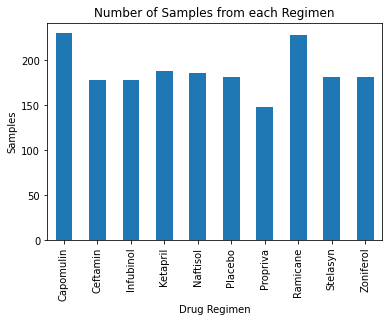

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#get counts of all samples for each drug
mice_count =clean_mice.reset_index().groupby('Drug Regimen').count()

#reset the index to allow plot to be done using the drug regime
mice_count =pd.DataFrame(mice_count).reset_index()
#plot the data as a bar graph with y as number of samples and x as the different drugs
mice_count.plot(kind='bar',x='Drug Regimen',y='Timepoint',ylabel='Samples',title='Number of Samples from each Regimen',legend=False)


Text(0.5, 0, 'Drug Regimen')

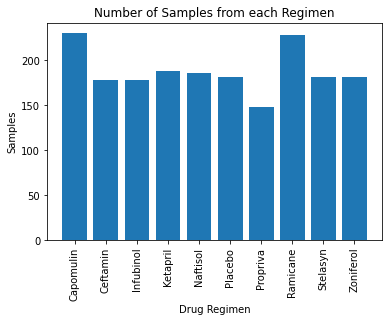

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#create a bar graph of samples per drug
plt.bar(mice_count['Drug Regimen'],mice_count['Timepoint'])

#rename axises and title of the graph
plt.ylabel('Samples')
plt.title('Number of Samples from each Regimen')
plt.xticks(mice_count['Drug Regimen'],rotation='vertical')
plt.xlabel('Drug Regimen')


<AxesSubplot:title={'center':'Tested Mice Sex Distribution'}, ylabel='Sex'>

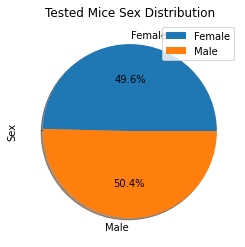

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#create a pie chart of gender distribution using a dataframe of unique mice grouped by sex
mice_sex= clean_mice.reset_index().drop_duplicates(subset='Mouse ID').groupby(['Sex']).count()
pd.DataFrame(mice_sex).plot.pie(y='Mouse ID', title='Tested Mice Sex Distribution', ylabel='Sex', autopct='%.1f%%',shadow=True)

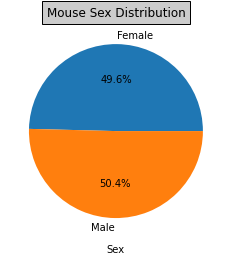

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#creates a pie chart using the info from the above group
plt.pie(x=pd.DataFrame(mice_sex)['Mouse ID'],labels=['Female','Male'],  autopct='%.1f%%')

#relabels the graph to look better and describe the data
plt.xlabel('Sex')
plt.title("Mouse Sex Distribution", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#sort the mice so it is ordered by mouce id and then timepoint
affected_mice = clean_mice.reset_index().sort_values(['Mouse ID','Timepoint'])

#since the timepoints are in acending order drop all mice but the last timepoint of each
affected_mice = affected_mice.drop_duplicates(subset='Mouse ID', keep='last')
#print data
affected_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1849,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1859,z581,Infubinol,Female,24,25,45,62.754451,3
1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = affected_mice['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
alloutliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    drug_tumorsizes = affected_mice.set_index('Drug Regimen').loc[treatment,'Tumor Volume (mm3)']
    

    # add subset 
    tumor_volumes.append(drug_tumorsizes)
    
    # Determine outliers using upper and lower bounds  
    # Calquilate quartiles and IQR then get bounds using 1.5IQR method  
    Q3 = np.quantile(drug_tumorsizes, 0.75)
    Q1 = np.quantile(drug_tumorsizes, 0.25)
    IQR = Q3-Q1
    upperbound= Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR

    #add each outlier to a dictionary with key:value being 'drug':[outliers]
    upperoutliers = drug_tumorsizes[drug_tumorsizes>upperbound]
    loweroutliers = drug_tumorsizes[drug_tumorsizes<lowerbound]

    alloutliers.append({treatment:[upperoutliers,loweroutliers]})

    

alloutliers

[{'Infubinol': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   Drug Regimen
   Infubinol    36.321346
   Name: Tumor Volume (mm3), dtype: float64]},
 {'Placebo': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   Series([], Name: Tumor Volume (mm3), dtype: float64)]},
 {'Ceftamin': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   Series([], Name: Tumor Volume (mm3), dtype: float64)]},
 {'Stelasyn': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   Series([], Name: Tumor Volume (mm3), dtype: float64)]},
 {'Zoniferol': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   Series([], Name: Tumor Volume (mm3), dtype: float64)]},
 {'Ramicane': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   Series([], Name: Tumor Volume (mm3), dtype: float64)]},
 {'Ketapril': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   Series([], Name: Tumor Volume (mm3), dtype: float64)]},
 {'Propriva': [Series([], Name: Tumor Volume (mm3), dtype: float64),
   S

<Figure size 4608x504 with 0 Axes>

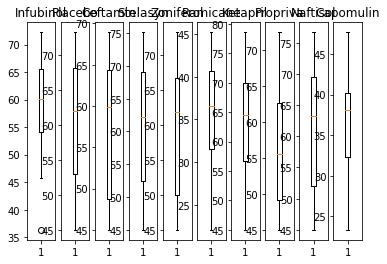

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#expand the figure to be larger to provide enough room for each boxplot
plt.figure(figsize=[64,7])
#create a subplot for each treatment
fig, axes= plt.subplots(1,len(treatments))

#create a boxplot for each treatment
for i in range(len(tumor_volumes)):
    axes[i].boxplot(tumor_volumes[i])
    axes[i].title.set_text(treatments[i])




## Line and Scatter Plots

<AxesSubplot:title={'center':'y793 tumor size over study (Capomulin)'}, xlabel='Timepoint'>

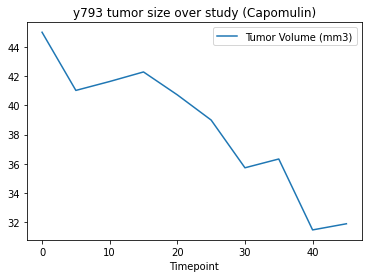

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#found that mouse y793 had Capomulin
mouse = 'y793'

#got the info for that mouse
individual_mouse = clean_mice.reset_index().loc[clean_mice.reset_index()['Mouse ID']==mouse]
#reset the index to make the data easier to work with
individual_mouse = individual_mouse.reset_index(drop=1)
#Get the name of the drug using the known data format
regimen = individual_mouse.loc[1,'Drug Regimen']
#makes a line plot of the tumor size over time using timepoints as the increments
individual_mouse.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',title=f'{mouse} tumor size over study ({regimen})')

<AxesSubplot:title={'center':'Capomulin'}, xlabel='g', ylabel='mm^3'>

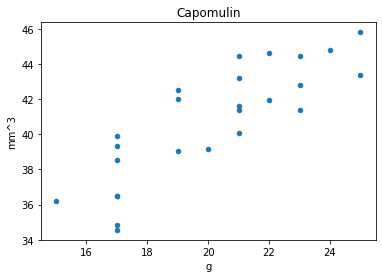

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#names the drug checking
regimen = 'Capomulin'
#gets the data for the mice of that drug
regimen_mice = clean_mice.loc[clean_mice['Drug Regimen']==regimen]


#creates a dataframe of that data by looking at the mean of tumor volume of each mouse
regimen_mice_grouped = pd.DataFrame(regimen_mice.groupby('Mouse ID').mean())

#create and print a scatterplot of datapoints being each mouse with x as weight of mouse and y as tumor size
regimen_plot = regimen_mice_grouped.plot(kind='scatter',x='Weight (g)',y="Tumor Volume (mm3)",title=regimen,ylabel= 'mm^3',xlabel='g')
regimen_plot

## Correlation and Regression

Text(6, 10, 'Tumor size(mm^3) = 0.96*Weight(g) + 21.49')

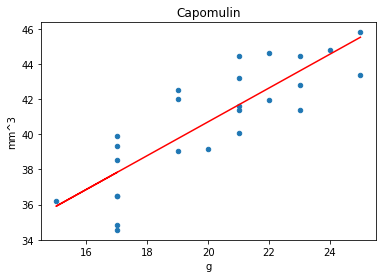

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#copy plot to show without running above code (VS code does not show all plots in jupyter only the ones run in the current box)
regimen_mice_grouped.plot(kind='scatter',x='Weight (g)',y="Tumor Volume (mm3)",title=regimen,ylabel= 'mm^3',xlabel='g')


#aquire linear regression data using the linregress method which uses the least squares method to calculate a slope line
(slope, intercept, rvalue, pvalue, stderr) = linregress(regimen_mice['Weight (g)'],regimen_mice["Tumor Volume (mm3)"])

#creates a line following the regressed formula and charts it against the earlier scatter plot
regress_values = regimen_mice['Weight (g)'] * slope + intercept
plt.plot(regimen_mice['Weight (g)'],regress_values,"r-")
#shows the equation of the line as a string
line_eq = "Tumor size(mm^3) = " + str(round(slope,2)) + "*Weight(g) + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
